## Hackathon Subscriber Prediction

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combined = pd.concat([train,test],ignore_index=False)
combined.shape , train.shape , test.shape

((30000, 17), (21000, 17), (9000, 16))

In [2]:
combined.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y_bool       9000
dtype: int64

In [3]:
combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0


In [4]:
num_cols = ['age','balance','duration','campaign','pdays','previous']

cat_cols = ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact', 'day', 'month', 'poutcome']

<Figure size 1000x2000 with 0 Axes>

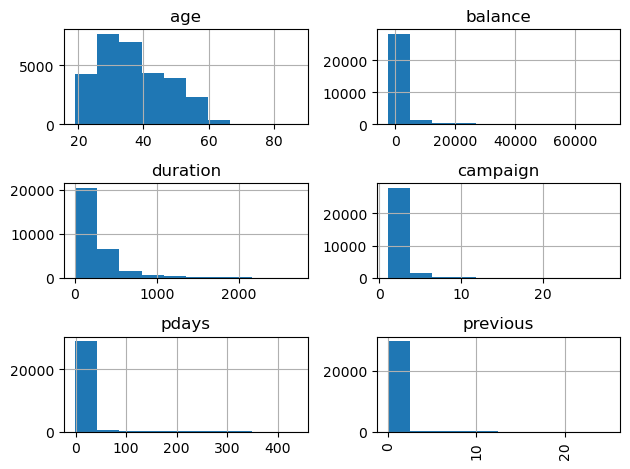

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# univariate Anaysis:

plt.figure(figsize=(10,20))
combined.loc[:,num_cols].hist()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [6]:
combined.loc[:,num_cols].describe()

,age,balance,duration,campaign,pdays,previous
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,36.978767,1608.013900,262.788833,2.003433,3.125600,0.100633
std,10.487325,2989.866596,285.880993,1.545111,23.002464,0.669369
min,19.000000,-2477.000000,4.000000,1.000000,-1.000000,0.000000
25%,29.000000,303.000000,94.000000,1.000000,-1.000000,0.000000
50%,35.000000,634.000000,183.000000,2.000000,-1.000000,0.000000
75%,45.000000,1880.000000,318.000000,2.000000,-1.000000,0.000000
max,87.000000,71188.000000,2703.000000,28.000000,437.000000,25.000000


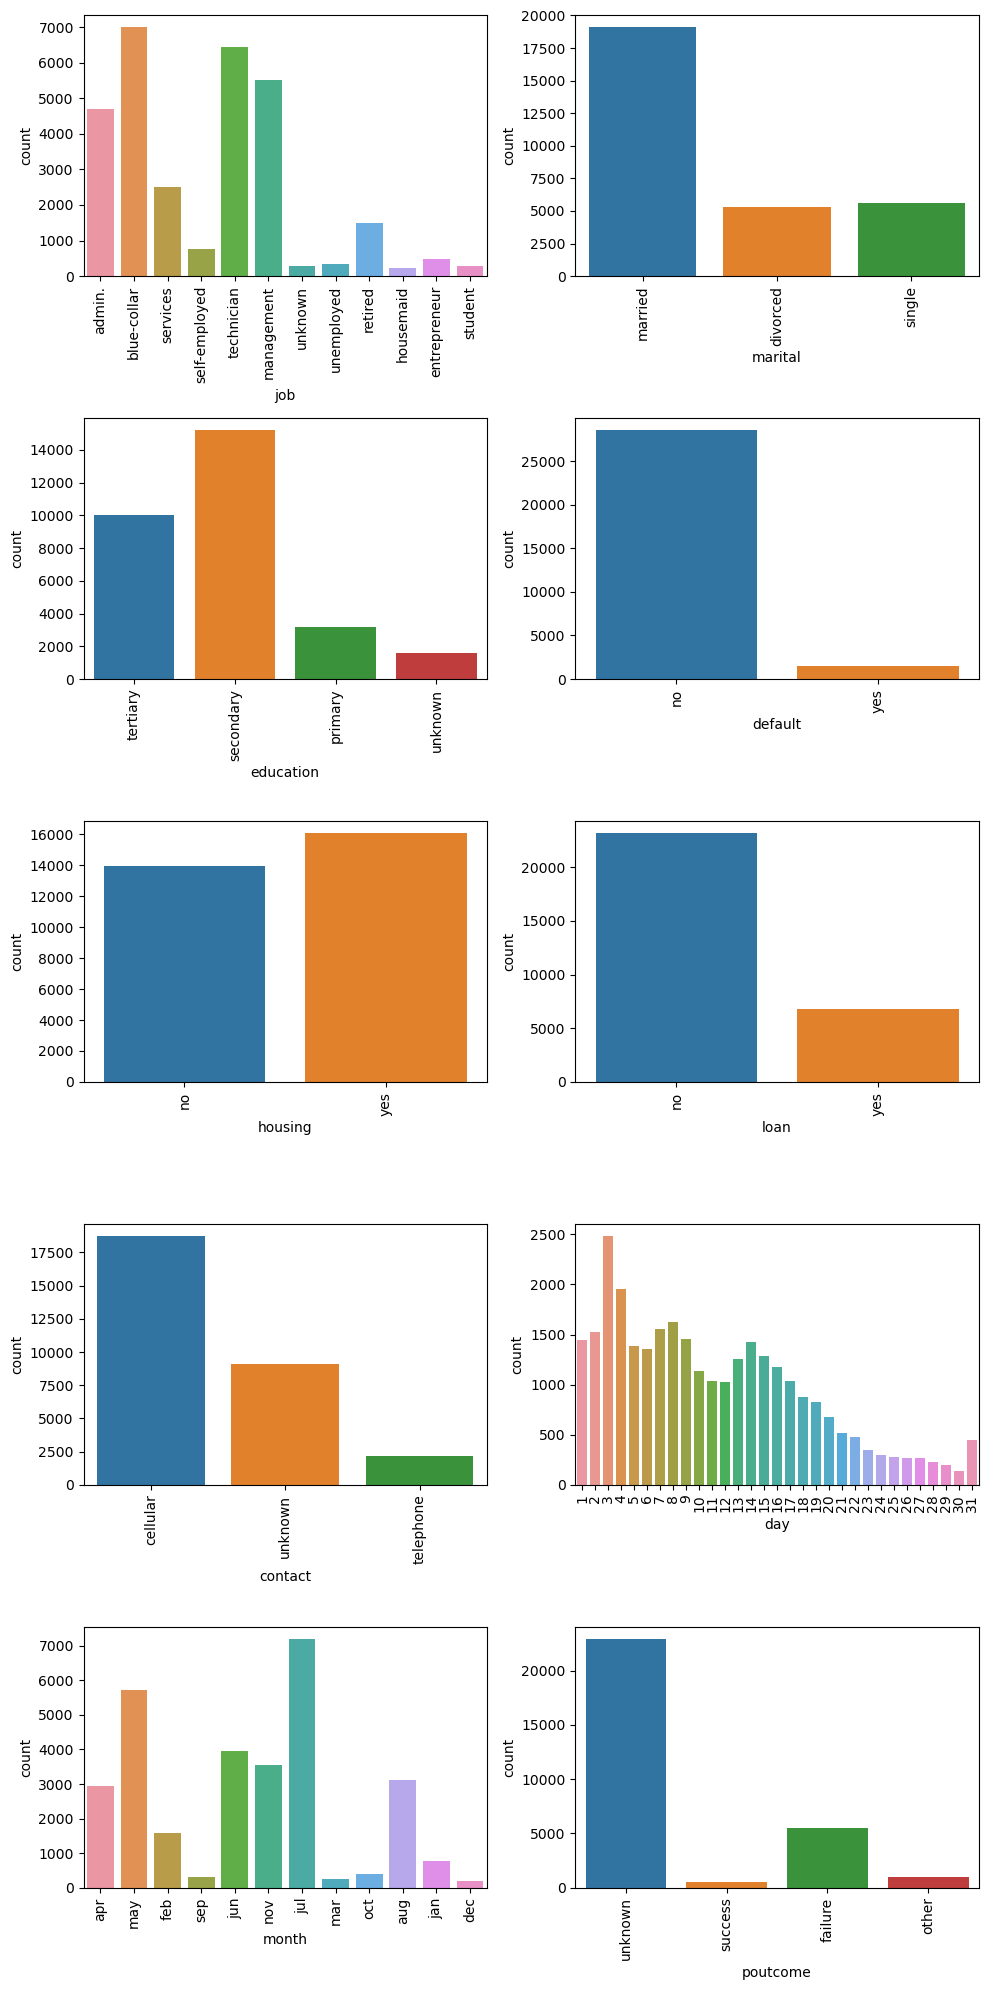

In [7]:
t = 1
plt.figure(figsize=(10,20))
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(x=combined[i])
    t+=1
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

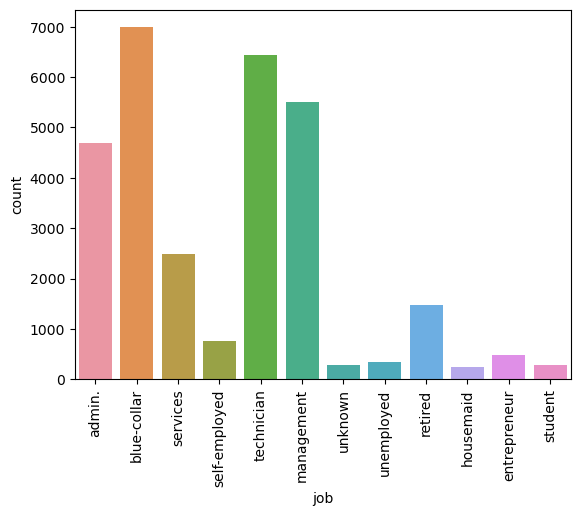

In [8]:
sns.countplot(x=combined['job'])
plt.xticks(rotation=90)
plt.show()

In [9]:
# self employed and enterpreneur 
list_ = ['housemaid','unknown','student','unemployed','retired']

list_e = ['self-employed','entrepreneur']

def cats(x):
    if x in list_:
        return('not_employed')
    elif x in list_e:
        return('business')
    else:
        return(x)

In [10]:
combined['job'] = combined['job'].apply(cats)

In [11]:
combined['job'].unique()

array(['admin.', 'blue-collar', 'services', 'business', 'technician',
       'management', 'not_employed'], dtype=object)

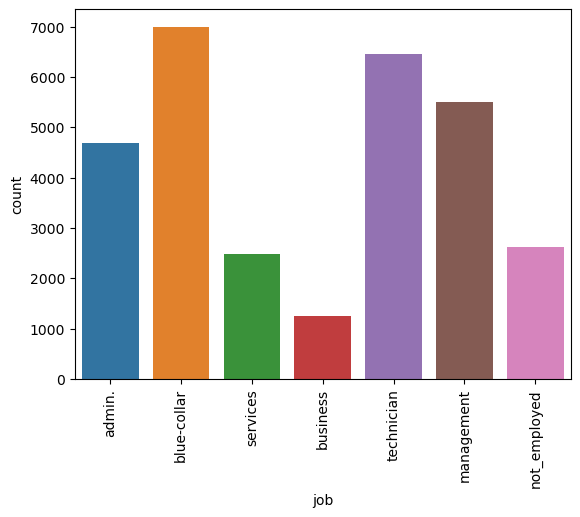

In [12]:
sns.countplot(x=combined['job'])
plt.xticks(rotation=90)
plt.show()

In [13]:
combined['month'].value_counts()[:5].index

Index(['jul', 'may', 'jun', 'nov', 'aug'], dtype='object')

In [14]:
combined.y_bool.value_counts() # DATA is Imbalanced

0.0    15349
1.0     5651
Name: y_bool, dtype: int64

In [16]:
combined['age'].unique()

array([51, 55, 65, 25, 36, 52, 22, 31, 30, 57, 29, 42, 39, 34, 28, 60, 21,
       37, 35, 27, 48, 53, 54, 47, 41, 44, 50, 38, 43, 24, 26, 56, 33, 23,
       32, 40, 58, 46, 62, 19, 20, 49, 45, 61, 59, 71, 77, 68, 66, 70, 87,
       63, 82, 69, 74, 80, 67, 73, 81, 75, 64, 76, 85, 78, 84, 83, 72, 86,
       79], dtype=int64)

In [17]:
combined.day.value_counts()

3     2483
4     1951
8     1627
7     1555
2     1526
9     1457
1     1450
14    1422
5     1382
6     1354
15    1288
13    1255
16    1175
10    1139
11    1034
17    1033
12    1023
18     879
19     823
20     678
21     520
22     482
31     444
23     344
24     302
25     275
27     271
26     266
28     229
29     196
30     137
Name: day, dtype: int64

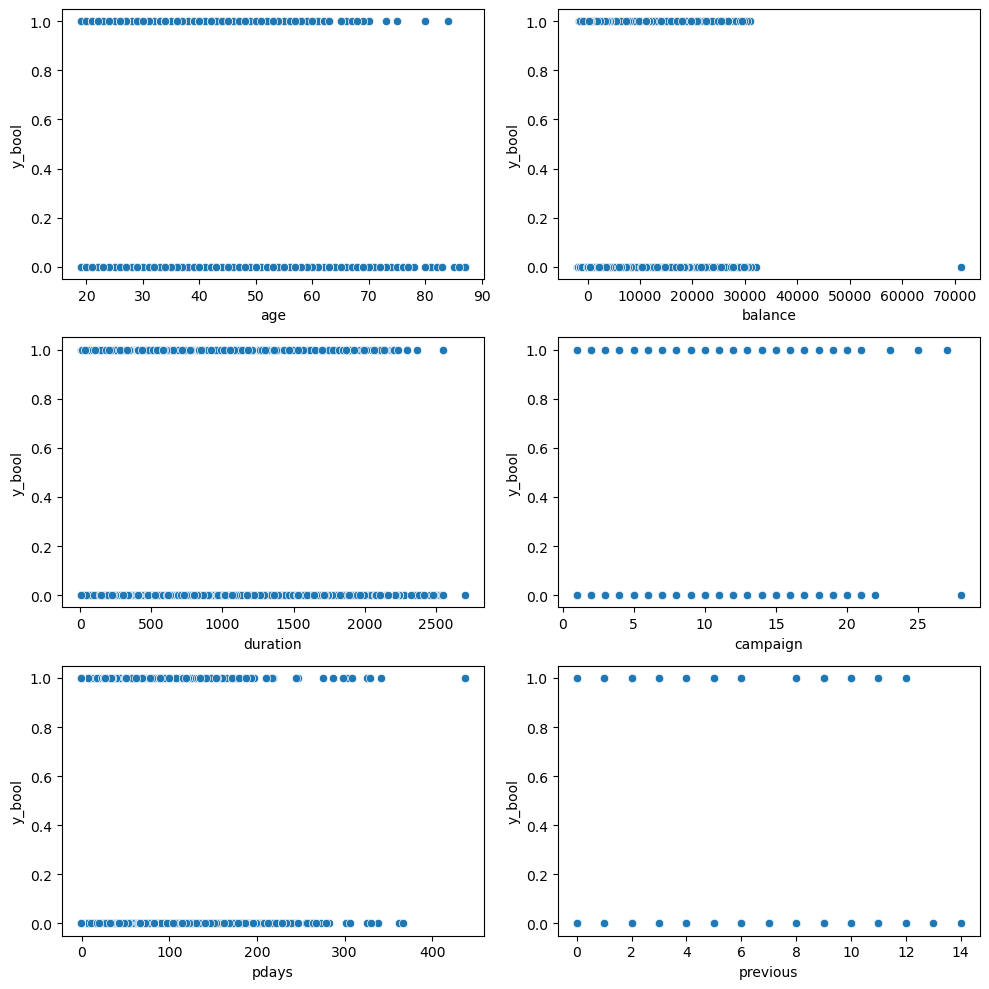

In [18]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.scatterplot(x=combined[i],y=combined['y_bool'])
    t+=1
    
plt.tight_layout()
plt.show()

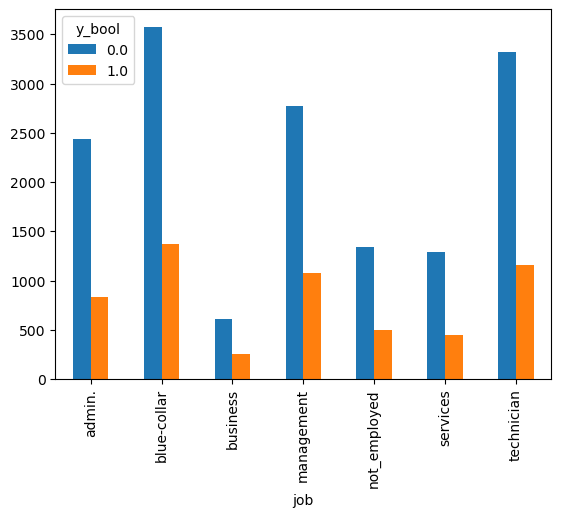

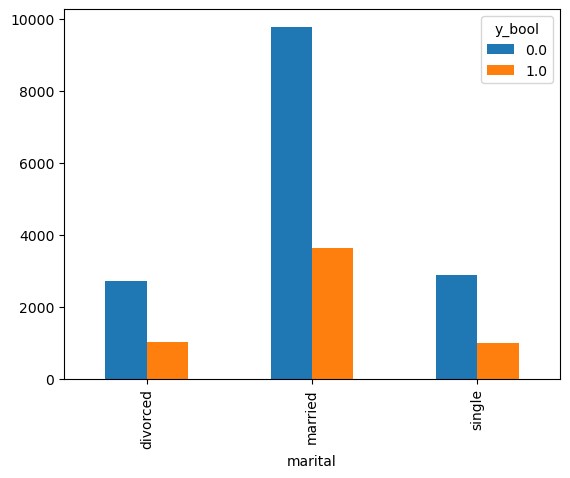

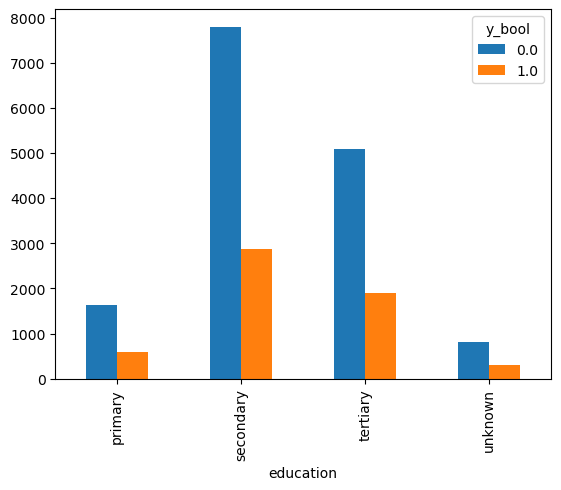

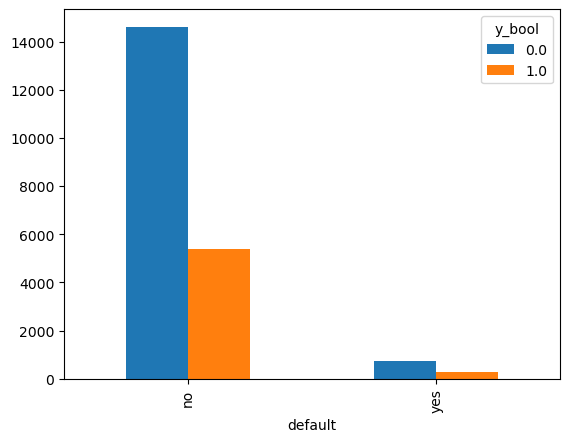

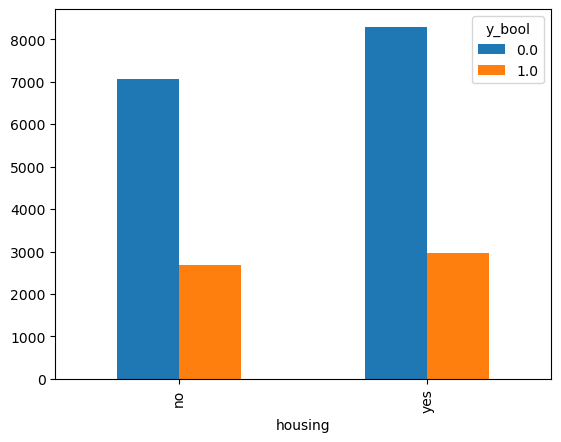

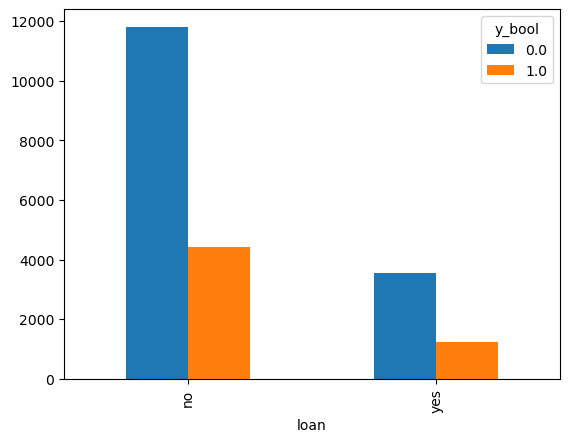

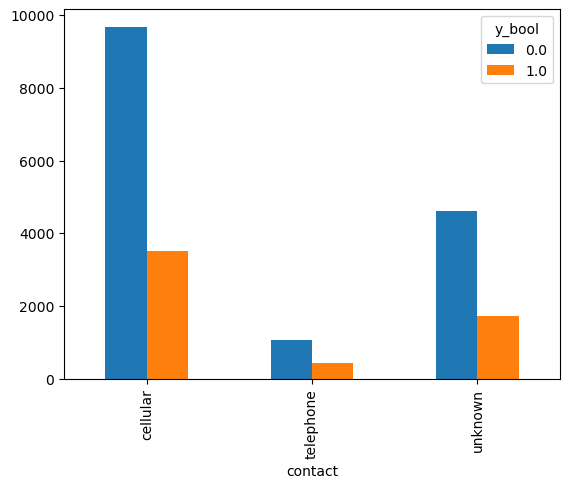

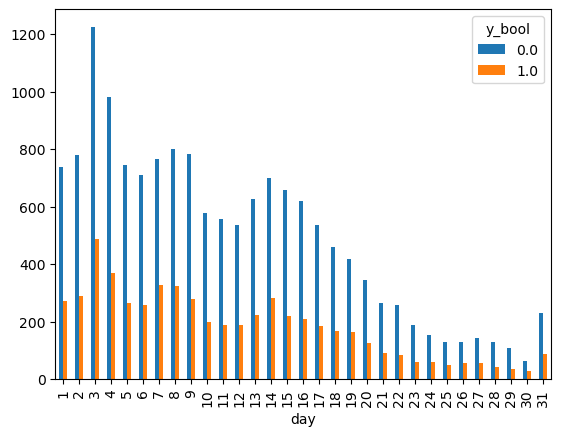

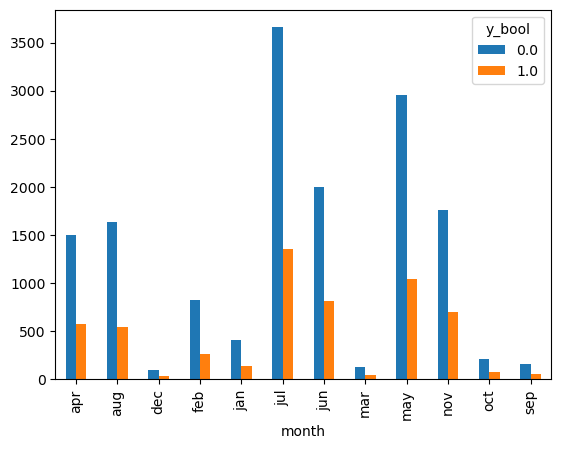

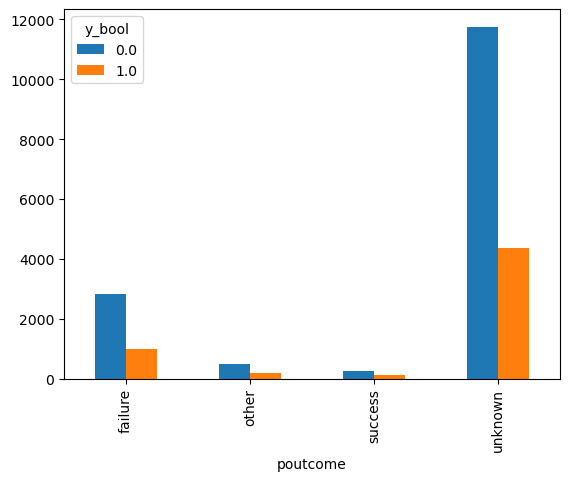

In [19]:
for i in cat_cols:
    pd.crosstab(combined[i],combined['y_bool']).plot(kind='bar')

In [20]:
# Day

combined['day'] = combined.day.apply(lambda x:'fortnight' if x in np.arange(1,16) else 'Month_End')

In [21]:
# categorical encoding:
combined.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,fortnight,apr,263,2,-1,0,unknown,0.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,fortnight,may,315,1,-1,0,unknown,0.0


In [22]:
# month wise duration
combined['phone_calls'] = combined.groupby('month')['duration'].transform('count')
combined['mean_duration'] = combined.groupby('month')['duration'].transform('mean')
combined['median_duration'] = combined.groupby('month')['duration'].transform('median')
combined['min_duration'] = combined.groupby('month')['duration'].transform('min')
combined['max_duration'] = combined.groupby('month')['duration'].transform('max')


In [23]:
combined.groupby('month')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
apr,2943.0,1611.991845,2757.477949,-1768.0,315.00,645.0,1941.00,31860.0
aug,3125.0,1616.535680,2961.546844,-1877.0,305.00,644.0,1934.00,32187.0
dec,189.0,1453.232804,2545.234857,-1397.0,266.00,611.0,1893.00,27027.0
feb,1590.0,1738.057233,3209.966233,-1647.0,336.25,654.5,2015.50,30551.0
jan,766.0,1931.228460,3677.824683,-1284.0,320.50,716.0,2099.50,29358.0
jul,7196.0,1587.718455,2921.093434,-2477.0,308.00,633.0,1860.75,71188.0
jun,3946.0,1577.689052,3034.820180,-1721.0,309.00,638.0,1838.00,71188.0
mar,251.0,1591.565737,3475.334462,-2072.0,257.00,556.0,1672.50,29307.0
may,5727.0,1624.865375,3035.580499,-1567.0,293.00,629.0,1860.00,31423.0


In [24]:
combined.education.unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [25]:
mapped = {'tertiary':3, 'secondary':2, 'primary':1, 'unknown':0}

combined['education'] = combined.education.map(mapped)

In [26]:
combined['mean_balance'] = combined.groupby('month')['balance'].transform('mean')
combined['median_balance'] = combined.groupby('month')['balance'].transform('median')
combined['min_balance'] = combined.groupby('month')['balance'].transform('min')
combined['max_balance'] = combined.groupby('month')['balance'].transform('max')
combined['std_balance'] = combined.groupby('month')['balance'].transform('std')


In [27]:
list_q1 = ['jan','feb','mar']
list_q2 = ['apr','may','jun']
list_q3 = ['jul','aug','sep']

def qs(x):
    if x in list_q1:
        return(1)
    elif x in list_q2:
        return(2)
    elif x in list_q3:
        return(3)
    else:
        return(4)
    
    
combined['quartile'] = combined.month.apply(qs)

In [28]:
combined.drop('month',axis=1,inplace=True)

In [29]:
newtrain = combined.iloc[0:train.shape[0],:]
newtest = combined.iloc[train.shape[0]:,:]

In [30]:
dummy_train = pd.get_dummies(newtrain,drop_first=True)
dummy_test = pd.get_dummies(newtest,drop_first=True)
x = dummy_train.drop(columns='y_bool')
y = dummy_train['y_bool']

dummy_test.drop(columns='y_bool',inplace=True)


In [31]:
newtest.shape,newtrain.shape,test.shape,train.shape,combined.shape,dummy_test.shape,x.shape

((9000, 27),
 (21000, 27),
 (9000, 16),
 (21000, 17),
 (30000, 27),
 (9000, 35),
 (21000, 35))

In [32]:
# smote 
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
sm_x , sm_y = sm.fit_resample(x,y)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier


In [34]:
# base model
def base_models():
    models = dict()
    models['LR'] = LogisticRegression()
    models['DTREE'] = DecisionTreeClassifier()
    models['RF'] = RandomForestClassifier()
    models['GBM'] = GradientBoostingClassifier()
    models['XGB'] = XGBClassifier()
    models['ADA'] = AdaBoostClassifier()
    return models

In [35]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import log_loss,make_scorer

func = make_scorer(log_loss)
def eval_models(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1001)
    scores = cross_val_score(estimator=model, X = sm_x,y = sm_y,cv=cv,scoring=func,
                            n_jobs=-1)
    return scores




In [36]:
models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(result))

LR 16.997968405109294
DTREE 14.35557686107542
RF 12.469718787219671
GBM 11.758973767132902
XGB 11.271237820275042
ADA 11.047644394307328


In [37]:
from sklearn.ensemble import StackingClassifier

GBM = GradientBoostingClassifier()
XGB = XGBClassifier()
ADA = AdaBoostClassifier()
RF = RandomForestClassifier()


base_estimators = [('GBM',GBM),('XGB',XGB),('ADA',ADA)]
stack = StackingClassifier(estimators = base_estimators,final_estimator=RF,cv=5)

pred = stack.fit(sm_x,sm_y).predict(dummy_test)

In [38]:
submission = pd.read_csv('submission.csv')
submission['y_bool'] = pred

In [39]:
submission.to_csv('stack1.csv',index=False)

In [40]:
ADA.fit(sm_x,sm_y)
ada_pred = ADA.predict(dummy_test)

In [41]:
submission = pd.read_csv('submission.csv')
submission['y_bool'] = ada_pred
submission.to_csv('ada_pred.csv',index=False)

In [42]:
XGB.fit(sm_x,sm_y)
xgb_pred = XGB.predict(dummy_test)

In [43]:
submission = pd.read_csv('submission.csv')
submission['y_bool'] = xgb_pred
submission.to_csv('xgb_pred.csv',index=False)

#### Without SMOTE

In [44]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import log_loss,make_scorer

func = make_scorer(log_loss)
def eval_models(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1001)
    scores = cross_val_score(estimator=model, X = x,y = y,cv=cv,scoring=func,
                            n_jobs=-1)
    return scores




In [45]:
models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(result))

LR 9.699175490566715
DTREE 12.12783118321437
RF 11.372058705007642
GBM 10.961132450297589
XGB 10.832319298542675
ADA 10.646036543884


In [46]:
from sklearn.ensemble import StackingClassifier

GBM = GradientBoostingClassifier()
XGB = XGBClassifier()
ADA = AdaBoostClassifier()
RF = RandomForestClassifier()
LR = LogisticRegression()

base_estimators = [('GBM',GBM),('XGB',XGB),('ADA',ADA)]
stack = StackingClassifier(estimators = base_estimators,final_estimator=LR,cv=5)

pred = stack.fit(x,y).predict(dummy_test)

In [47]:
submission = pd.read_csv('submission.csv')
submission['y_bool'] = pred

In [48]:
submission.to_csv('stack_no_smote.csv',index=False)

without smote use stacking classifier gives better result

#### Public Score : 8.74982
#### Private Score : 9.26791
#### Website : Machine Hack

## END.......